Import libraries

In [15]:
import random
from typing import Any
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [16]:
class RecyclingNN():
    def __init__(self, img_size : int = 256, compression_factor : int = 16, alpha : float = .5, min : float = -1., max : float = 1.) -> None:
        self.compression_factor = compression_factor
        first_layer_size = img_size ** 2 * 3
        sec_layer_size = (img_size // compression_factor) ** 2 * 3
        self.weights = {
            "W1" : np.random.uniform(min, max, size=(first_layer_size, sec_layer_size)), 
            "W2" : np.random.uniform(min, max, size=(sec_layer_size, first_layer_size))
        }
        self.alpha = alpha
        self.activation_function = lambda x: self.__relu__(x)

    def __relu__(self, X : np.array) -> np.array:
        res_matrix = np.maximum(0, X)
        return res_matrix

    def __relu_der__(self, X : np.array) -> np.array:
        res_matrix = (X > 0).astype(int) 
        return res_matrix

    def forward(self, X, return_cache=False):
        Z1 = self.weights["W1"].T @ X
        A1 = self.activation_function(Z1)
        Z2 = self.weights["W2"].T @ A1
        A2 = Z2
        if return_cache:
            return A2, A1, Z1
        return A2

    def backprop(self, X, y):
        W1, W2 = self.weights.values()
        y_pred, A1, Z1 = self.forward(X, return_cache=True)
        dZ2 = y_pred - y    # (100, 1)
        dW2 = (dZ2 @ A1.T).T   # (100, 1) x (1, 50) = (100, 50)

        dZ1 = (W2 @ dZ2) * self.__relu_der__(Z1)   # (50, 100) @ (100, 1) = (50, 1)
        del dZ2, y_pred
        dW1 = (dZ1 @ X.T ).T    # (50, 1) @ (1, 100) = (50, 100)
        del dZ1
        self.weights['W1'] = W1 - self.alpha * dW1
        self.weights['W2'] = W2 - self.alpha * dW2
    
    def compute_cost(self, X, func='MAE'):
        y_pred = self.forward(X)
        cost = y_pred - X
        return np.abs(cost).sum()
 
    def __call__(self, X : list):
        return self.forward(X)

In [17]:
def convert_image_to_matrix(path : str):
  img = list(cv2.imread(path).reshape((256 ** 2 * 3, 1)))
  return np.array(img)

def show_image_from_output(output : np.array):
  output = np.reshape(output, (256, 256, 3))
  cv2_imshow(output)

In [18]:
model = RecyclingNN()
X = convert_image_to_matrix('/content/cat_paper.png')
losses = []
for _ in range(10):
    model.backprop(X, X)
    losses.append(model.compute_cost(X, X))



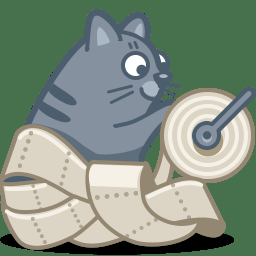

In [19]:
cv2_imshow(cv2.imread('/content/cat_paper.png'))

In [26]:
A2, A1, Z1 = model.forward(X, True)
A2.sum()

0.0